# 1. Preps

In [1]:
def warner_2D_plot(x_axis,y_axis,var,tmin,tmax,dc,cmap):
    
    fig, ax  = plt.subplots    (figsize=(15,6))
    norm_fld = colors.Normalize(vmin=tmin, vmax=tmax, clip=False)
    vcont    = np.arange       (tmin, tmax + dc, dc)
    cs = ax.pcolormesh(x_axis,y_axis,var,norm=norm_fld,cmap=cmap)
    cbar = plt.colorbar (cs, orientation='horizontal', shrink=0.75,pad=0.2)
    cbar.set_label('S [gkg$^{-1}$]') # add colorbar label
    xticks = np.linspace(tmin,tmax,num=5)
    cbar.set_ticks(xticks)
    ax.set_xlabel('Distance along x [km]')
    ax.set_ylabel('Depth [m]')
    plt.xticks(np.arange(0, 100000+1, 20000))
    ax.tick_params(labeltop=False, labelright=False,direction = 'inout')

# 1.1 Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import netCDF4
import cmocean 
import matplotlib.colors as colors
import datetime

# 1.2 Pre-set parameters for plotting

In [3]:
plt.rcParams.update({
    "font.weight": "normal",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "lines.color": "k",
    "axes.titlesize": 18,
    "axes.titleweight": "normal",
    "axes.labelweight": "bold",
    "axes.labelsize": 18,
    "contour.linewidth": 0.8
})

# 2. Open datasets and extract variables

In [4]:
path_file = '/home/henell/WORK/tools/GETM/setups/warner/warner.3d.nc'
id_file = netCDF4.Dataset(path_file, 'r')

xc    = id_file.variables['xc'][:]
time  = id_file.variables['time'][:]
sigma = id_file.variables['sigma'][:]
salt  = id_file.variables['salt'][:,:,0,:]
uu    = id_file.variables['uu'][:,:,0,:]

In [5]:
(Nt,Nk,Ni) = np.shape(salt[:,:,:])
print('\n Shape of the domain Nt, Nk, Ni = ',Nt,Nk,Ni)


 Shape of the domain Nt, Nk, Ni =  113 41 201


# 3. Plotting

In [6]:
cmap_temp = cm.get_cmap("Spectral_r")
cmap_uu = cm.get_cmap("RdBu_r")
cmap_salt = cm.get_cmap("cubehelix") 

<ipython-input-1-99481c58feb5>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = ax.pcolormesh(x_axis,y_axis,var,norm=norm_fld,cmap=cmap)


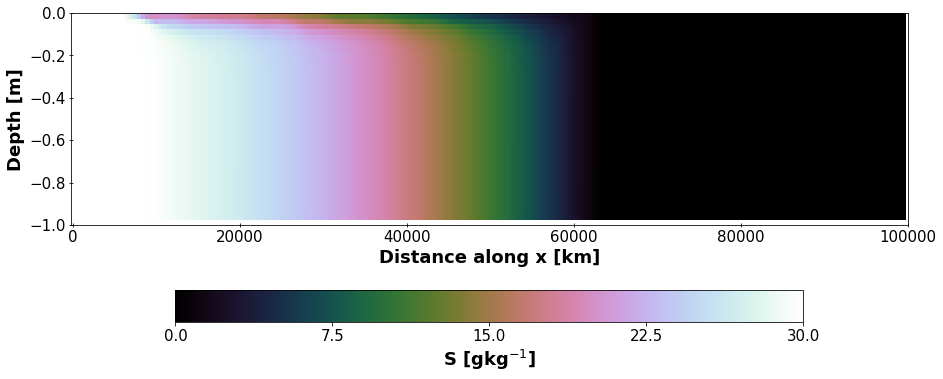

In [7]:
warner_2D_plot(xc,sigma,salt[50,:,:],0,30,5,cmap_salt)

<ipython-input-1-99481c58feb5>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = ax.pcolormesh(x_axis,y_axis,var,norm=norm_fld,cmap=cmap)


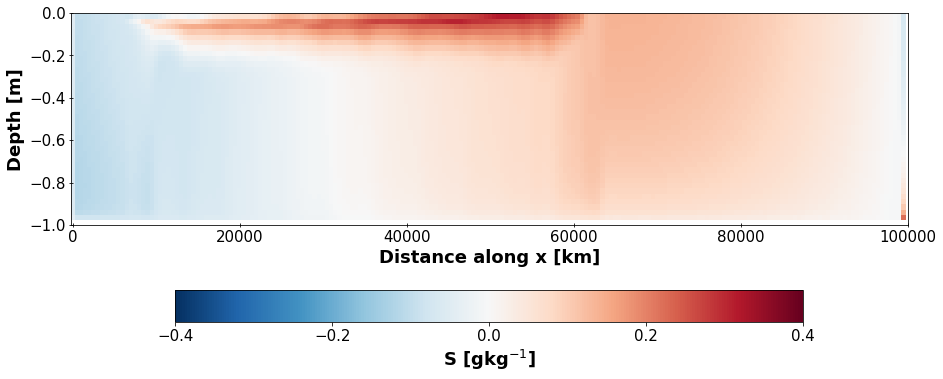

In [8]:
warner_2D_plot(xc,sigma,uu[50,:,:],-0.4,0.4,0.1,cmap_uu)